In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [4]:
%matplotlib inline
from pathlib import Path
import itertools

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams 

import seaborn as sns

from palmerpenguins import load_penguins

from matplottoy.data import iris
from matplottoy.encoders import color, position
from matplottoy.artists import point, bar, utils


spath = Path("../../../draft/figures/code/")
rcParams['figure.dpi'] = 200

In [5]:
penguins = load_penguins()

In [6]:
dict(penguins.dtypes)

{'species': dtype('O'),
 'island': dtype('O'),
 'bill_length_mm': dtype('float64'),
 'bill_depth_mm': dtype('float64'),
 'flipper_length_mm': dtype('float64'),
 'body_mass_g': dtype('float64'),
 'sex': dtype('O'),
 'year': dtype('int64')}

In [7]:
penguins['species'].value_counts().reset_index()

,index,species
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


In [8]:
table = iris.DataFrame(penguins['species'].value_counts().reset_index())

In [9]:
table.view().keys()

Index(['index', 'species'], dtype='object')

In [10]:
fts = {'position':{'name':'index', 
                   'encoder': position.Nominal({'Adelie': 0,  'Chinstrap': 1, 'Gentoo': 2})},  
        'length': {'name': 'species'},
        'facecolors': {'name':'index', 
                       'encoder': color.Categorical({'Adelie':'#FF8C00',
                                                'Gentoo':'#159090',
                                                'Chinstrap':'#A034F0'})}}

In [11]:
table.view()['index']

0       Adelie
1       Gentoo
2    Chinstrap
Name: index, dtype: object

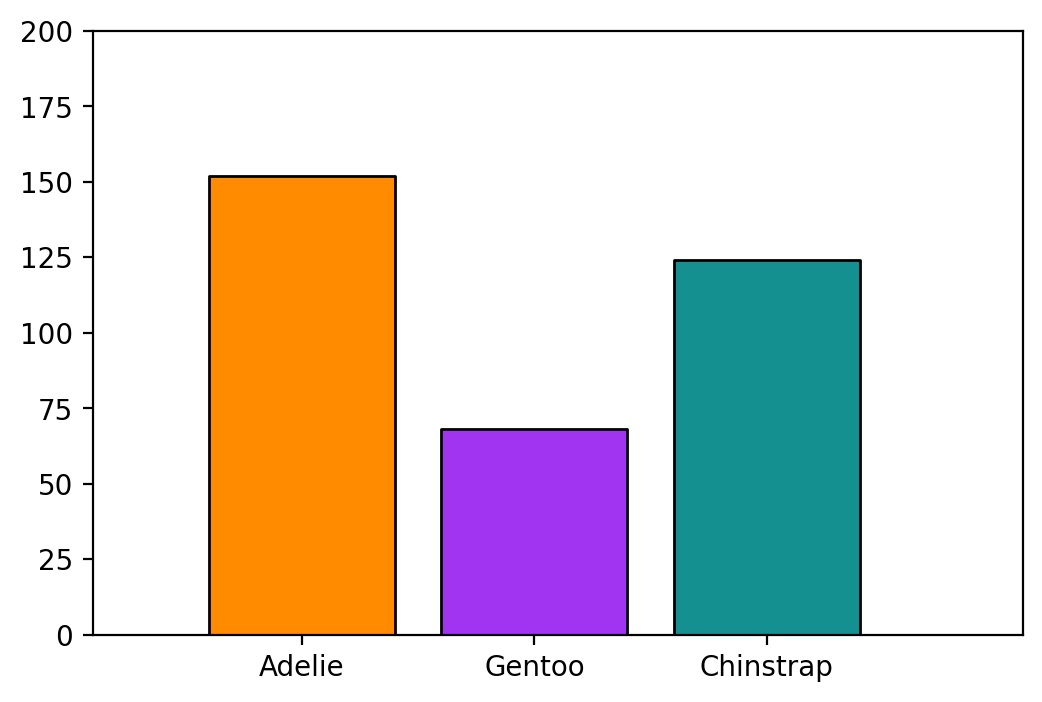

In [12]:
fig, ax = plt.subplots()

artistv = bar.Bar(table, fts, orientation='v')
ax.add_artist(artistv)
ax.set(xlim = (-0.5, 3.5), 
       ylim = (0,200),
       xticks = [.4, 1.4, 2.4],
       xticklabels = table.view(None)['index'])
fig.savefig(spath/"bar_v.png",  bbox_inches='tight')

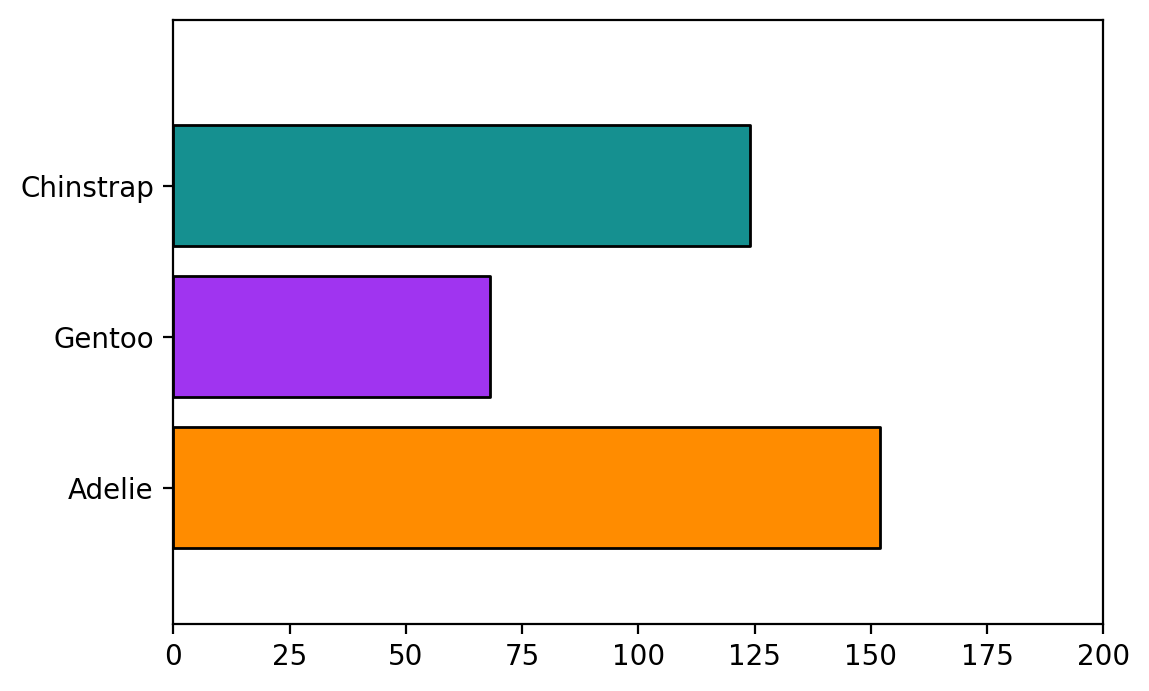

In [13]:
fig, ax = plt.subplots()

artisth = bar.Bar(table, fts, orientation='horizontal')
ax.add_artist(artisth)
ax.set(ylim = (-0.5, 3.5), 
       xlim = (0,200),
       yticks = [.4, 1.4, 2.4],
       yticklabels = table.view(None)['index'])
fig.savefig(spath/"bar_h.png",  bbox_inches='tight')

# grouped bar

In [14]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [15]:
df = penguins.groupby(['island','species']).count()['sex'].reset_index()

In [43]:
sb = penguins.groupby(['species', 'sex']).count()['year'].reset_index()

<AxesSubplot:>

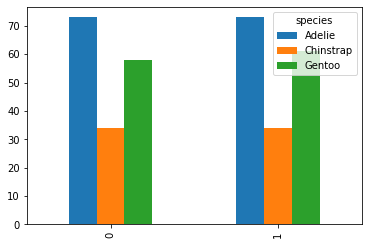

In [58]:
sb.pivot(index=['sex'], columns=['species'], values = 'year').reset_index().plot.bar(stacked=False)

<AxesSubplot:>

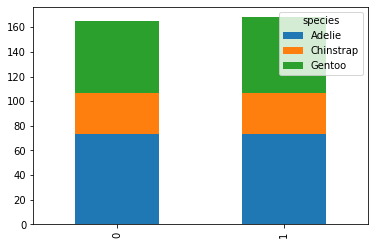

In [59]:
sb.pivot(index=['sex'], columns=['species'], values = 'year').reset_index().plot.bar(stacked=True)

In [73]:
sb

,species,sex,year
0,Adelie,female,73
1,Adelie,male,73
2,Chinstrap,female,34
3,Chinstrap,male,34
4,Gentoo,female,58
5,Gentoo,male,61


In [84]:
wide_table = sb.pivot(index=['sex'], columns=['species'], values='year').reset_index()
for s in ['Adelie', 'Chinstrap', 'Gentoo']:
    wide_table[f'{s}_c'] = s

In [85]:
bt = iris.DataFrame(wide_table)

In [112]:
print(bt.view().to_latex())

\begin{tabular}{llrrrlll}
\toprule
species &     sex &  Adelie &  Chinstrap &  Gentoo & Adelie\_c & Chinstrap\_c & Gentoo\_c \\
\midrule
0 &  female &      73 &         34 &      58 &   Adelie &   Chinstrap &   Gentoo \\
1 &    male &      73 &         34 &      61 &   Adelie &   Chinstrap &   Gentoo \\
\bottomrule
\end{tabular}



In [86]:
cmap = color.Categorical({'Adelie':'#FF8C00', 'Gentoo':'#159090','Chinstrap':'#A034F0'})
ts = {'position': {'name':'sex',
                    'encoder': position.Nominal({'female':0, 'male':1})}} 
mgts = {'length': {'name': ['Adelie', 'Chinstrap', 'Gentoo']},
        'facecolors': {'name': ['Adelie', 'Chinstrap', 'Gentoo'], 
                       'encoder': cmap}} 
sgts = {'length':{'name': ['Adelie']},
        'facecolors' :{'name':['Adelie'], 'encoder':cmap}}

In [94]:
group_transforms =  [{'length': {'name':'Adelie'},
                      'facecolors': {'name':"Adelie_c", 'encoder':cmap}},
                     {'length': {'name':'Chinstrap'},
                      'facecolors': {'name':"Chinstrap_c", 'encoder':cmap}}, 
                     {'length': {'name':'Gentoo'},
                      'facecolors': {'name':"Gentoo_c", 'encoder':cmap}}]

In [95]:
# to do - this should just work
should_do = {'position': {'name':'sex',  'encoder': position.Nominal({'female':0, 'male':1})}, 
      'length': {'name': 'year'},
      'facecolors':{'name': 'species', 'encoder': cmap}}

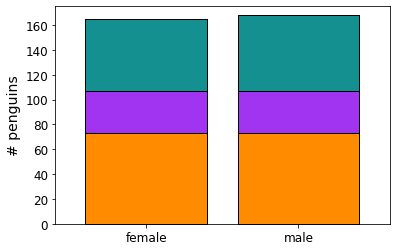

In [122]:
fig, ax = plt.subplots()
artistSB = bar.StackedBar(bt, ts, group_transforms)
ax.add_artist(artistSB)
_ = ax.set(ylim = (0, 175), 
       xlim = (-.2, 2),  
        xticks = (.4, 1.4),
        xticklabels = ['female', 'male'],
       xlabel = "")
ax.set_ylabel("# penguins", fontsize=14 )
ax.tick_params(labelsize=12)
fig.savefig(spath/"bar_stacked.png",  bbox_inches='tight')

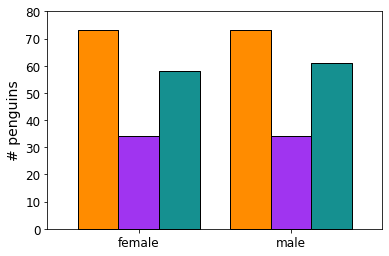

In [123]:
fig, ax = plt.subplots()
artistGB = bar.GroupedBar(bt, ts, group_transforms)
ax.add_artist(artistGB)
_ = ax.set(ylim = (0, 80), 
       xlim = (-.2, 2),  
            xticks = (.4, 1.4),
        xticklabels = ['female', 'male'],
       xlabel = "")
ax.set_ylabel("# penguins", fontsize=14 )
ax.tick_params(labelsize=12)
fig.savefig(spath/"bar_grouped.png",  bbox_inches='tight')

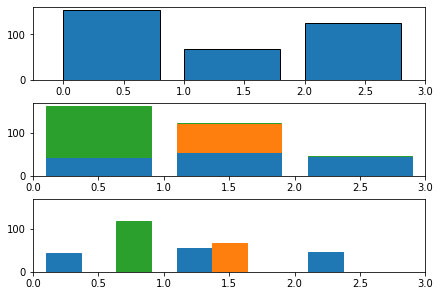

In [26]:
%matplotlib inline
import matplotlib.path as mpath
import matplotlib.patches as mpatches

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, constrained_layout=True)
for a in artistv._paths:
    path = mpath.Path(a.vertices, a.codes, closed=True)
    patch = mpatches.PathPatch(path)
    ax1.add_patch(patch)
_ = ax1.set(ylim = (0, 160), xlim = (-0.25, 3))
for c, col in zip(artistSB.children, ['C0', 'C1', 'C2']):
    for a in c._paths:
        path = mpath.Path(a.vertices, a.codes, closed=True)
        patch = mpatches.PathPatch(path, color=col)
        ax2.add_patch(patch)
_ = ax2.set(ylim = (0, 170), xlim = (-0, 3))
for c, col in zip(artistGB.children, ['C0', 'C1', 'C2']):
    for a in c._paths:
        path = mpath.Path(a.vertices, a.codes, closed=True)
        patch = mpatches.PathPatch(path, color=col)
        ax3.add_patch(patch)
_ = ax3.set(ylim = (0, 170), xlim = (-0, 3))